## Questions to Answer


The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


df = pd.read_csv('Data/df_2002-2014_no_2007.csv.gz', low_memory=False)
df.head()

,imdb_id,budget,revenue,title,certification
0,tt0096056,0.0,0.0,Crime and Punishment,NaN
1,tt0118926,0.0,5227348.0,The Dancer Upstairs,R
2,tt0119980,0.0,0.0,Random Shooting in LA,NaN
3,tt0120679,12000000.0,56298474.0,Frida,R
4,tt0120804,33000000.0,102984862.0,Resident Evil,R


In [83]:
df.dropna(subset=['certification'], inplace=True)
df.isna().sum()

imdb_id          0
budget           0
revenue          0
title            0
certification    0
dtype: int64

In [84]:
df['certification'].value_counts()

R                                  3509
PG-13                              1863
NR                                 1646
PG                                  802
G                                   252
NC-17                                91
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
12                                    1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

## getting only the certifications I want

In [85]:
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts()

R                                  3510
PG-13                              1864
NR                                 1646
PG                                  802
G                                   252
NC-17                                91
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
12                                    1
10                                    1
Name: certification, dtype: int64

In [86]:
r_df = df.loc[(df['certification'] == 'R')]
r_df

,imdb_id,budget,revenue,title,certification
1,tt0118926,0.0,5227348.0,The Dancer Upstairs,R
3,tt0120679,12000000.0,56298474.0,Frida,R
4,tt0120804,33000000.0,102984862.0,Resident Evil,R
11,tt0149253,0.0,0.0,Texas '46,R
15,tt0160184,55000000.0,6632383.0,D-Tox,R
...,...,...,...,...,...
44307,tt4197006,0.0,0.0,The Sect,R
44329,tt4209020,0.0,0.0,Here kitty kitty!,R
44538,tt4416878,0.0,0.0,Lake Nowhere,R
44561,tt4473620,0.0,0.0,Witching Hour,R


In [87]:
g_df = df.loc[(df['certification'] == 'G')]
g_df

,imdb_id,budget,revenue,title,certification
10,tt0146063,0.0,0.0,The Princess and the Pea,G
27,tt0166813,80000000.0,122563539.0,Spirit: Stallion of the Cimarron,G
115,tt0243585,120000000.0,169956806.0,Stuart Little 2,G
231,tt0265662,20000000.0,75597042.0,The Rookie,G
276,tt0271582,0.0,1347988.0,Joshua,G
...,...,...,...,...,...
44228,tt4150316,0.0,0.0,Frozen in Time,G
44241,tt4157940,0.0,8520000.0,The Magical Brush,G
44558,tt4468650,0.0,0.0,神秘世界历险记2,G
44615,tt4591840,10000000.0,0.0,A Christmas Star,G


In [88]:
pg_df = df.loc[(df['certification'] == 'PG')]
pg_df

,imdb_id,budget,revenue,title,certification
6,tt0121765,120000000.0,649398328.0,Star Wars: Episode II - Attack of the Clones,PG
8,tt0133240,140000000.0,109578115.0,Treasure Planet,PG
14,tt0157472,26000000.0,38793283.0,Clockstoppers,PG
140,tt0248169,0.0,505675.0,Manna from Heaven,PG
148,tt0250223,58500000.0,111127553.0,Asterix & Obelix: Mission Cleopatra,PG
...,...,...,...,...,...
43883,tt3949650,33989696.0,0.0,Doraemon: New Nobita's Great Demon – Peko and ...,PG
44036,tt4044488,0.0,0.0,Message of Hope,PG
44042,tt4045666,0.0,0.0,Mumbai Delhi Mumbai,PG
44072,tt4061848,0.0,0.0,Alpha and Omega: The Legend of the Saw Tooth Cave,PG


In [89]:
pg_13_df = df.loc[(df['certification'] == 'PG-13')]
pg_13_df

,imdb_id,budget,revenue,title,certification
5,tt0120912,140000000.0,445135288.0,Men in Black II,PG-13
9,tt0145487,139000000.0,821708551.0,Spider-Man,PG-13
23,tt0164184,68000000.0,193921372.0,The Sum of All Fears,PG-13
29,tt0167261,79000000.0,926287400.0,The Lord of the Rings: The Two Towers,PG-13
34,tt0179098,21000000.0,10011050.0,Moonlight Mile,PG-13
...,...,...,...,...,...
44007,tt4027422,0.0,0.0,Subways,PG-13
44390,tt4246856,0.0,0.0,Wildflower,PG-13
44430,tt4288542,0.0,1695006.0,Viejos amigos,PG-13
44638,tt4684268,0.0,0.0,The Coffin Footage,PG-13


### Convert back to single df

In [90]:
df = pd.concat([g_df,pg_df,pg_13_df,r_df], ignore_index=True)
df

,imdb_id,budget,revenue,title,certification
0,tt0146063,0.0,0.0,The Princess and the Pea,G
1,tt0166813,80000000.0,122563539.0,Spirit: Stallion of the Cimarron,G
2,tt0243585,120000000.0,169956806.0,Stuart Little 2,G
3,tt0265662,20000000.0,75597042.0,The Rookie,G
4,tt0271582,0.0,1347988.0,Joshua,G
...,...,...,...,...,...
6423,tt4197006,0.0,0.0,The Sect,R
6424,tt4209020,0.0,0.0,Here kitty kitty!,R
6425,tt4416878,0.0,0.0,Lake Nowhere,R
6426,tt4473620,0.0,0.0,Witching Hour,R


In [91]:
df['certification'].value_counts()

R        3510
PG-13    1864
PG        802
G         252
Name: certification, dtype: int64

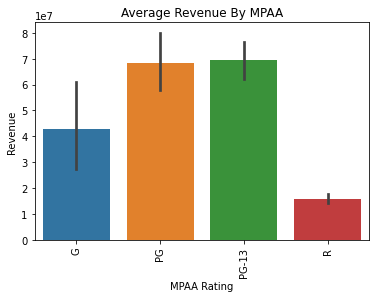

In [92]:
sns.barplot(data=df, x='certification', y= 'revenue')
plt.xticks(rotation = 90)
plt.title('Average Revenue By MPAA')
plt.xlabel('MPAA Rating')
plt.ylabel('Revenue');

Null Hypothesis:  Different MPAA Ratings all have the same results.

Alternative Hypothesis: Different MPAA Ratings have different Revenues. 

Using an alpha=.05

In [93]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R'])

## Testing Assumptions
Assumption of normality

In [94]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
G,252.0,4.894786e-61,277.739040
PG,802.0,2.583671e-134,615.194382
PG-13,1864.0,0.000000e+00,2067.031888
R,3510.0,0.000000e+00,3927.693039


In [95]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
G,252.0,4.894786e-61,277.739040,True
PG,802.0,2.583671e-134,615.194382,True
PG-13,1864.0,0.000000e+00,2067.031888,True
R,3510.0,0.000000e+00,3927.693039,True
